# Question 4

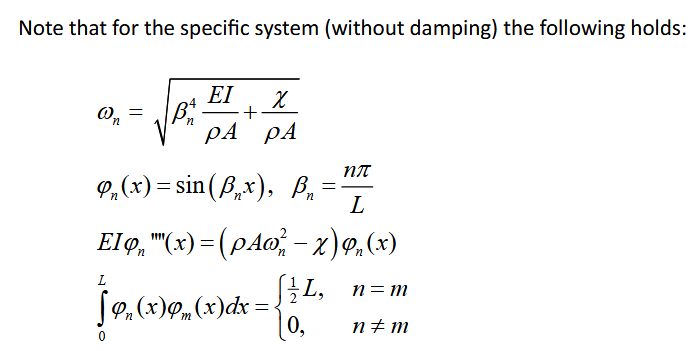

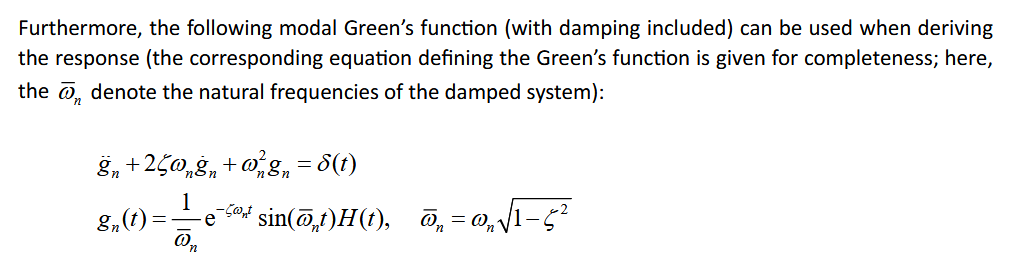

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
Q0 = 80E3
EI = 6.42E6
rhoA = 268.3
L = 100
xi = 7.3E6
zeta = 0.05

V_crit = ((4*xi*EI)/(rhoA)**2)**(1/4)
V = 0.75*V_crit

In [21]:
def beta(n):
    return np.pi * n / L

def mode_shape(x, n):
    return np.sin(beta(n) * x)

def omega(n):
    return np.sqrt(beta(n)**4 * EI/rhoA + xi/rhoA)

def omega_b(n):
    return omega(n) * np.sqrt(1 - zeta**2)

In [22]:
def green_function(t, n):
    return 1/omega_b(n) * np.exp(-zeta*omega(n)*t) * np.sin(omega_b(n)*t) * (t >= 0)

def Q_n(t, n):
    return 2*Q0/(rhoA*L) * mode_shape(V*t, n)

def g_n(t, n):
    n_integration = 1000
    def integrand(tau):
        return Q_n(tau, n) * green_function(t-tau, n)
    if t < L/V:
        result = np.trapezoid(integrand(np.linspace(0, t, n_integration)), dx=t/n_integration)
    else:
        result = np.trapezoid(integrand(np.linspace(0, L/V, n_integration)), dx=L/V/n_integration)
    return result

def w(x,t, N=10):
    total = 0
    for n in range(1, N+1):
        total += g_n(t, n) * mode_shape(x, n)
        
    return total

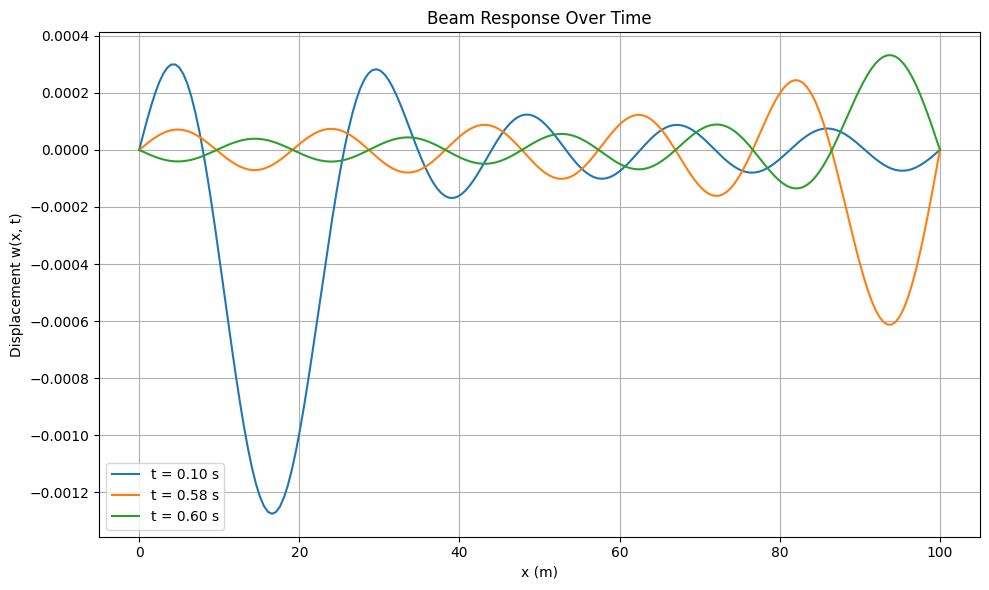

In [37]:
x_vals = np.linspace(0, L, 200)
t_vals = [0.1, L/V-0.01, L/V+0.01]  # Include t > L/V

# Plot results
plt.figure(figsize=(10, 6))
for t in t_vals:
    w_vals = [-w(x, t) for x in x_vals]
    plt.plot(x_vals, w_vals, label=f't = {t:.2f} s')
plt.title('Beam Response Over Time')
plt.xlabel('x (m)')
plt.ylabel('Displacement w(x, t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
fig, ax = plt.subplots()

t = np.linspace(0, 3*L/V, 100)
x_vals = np.linspace(0, L, 100)

line = ax.plot(x_vals, [-w(x, t[0]) for x in x_vals])[0]
line2 = ax.plot(V*t[0], 0, 'ro')[0]
ax.set(xlim=[0, L], ylim=[-0.002, 0.002], xlabel='X [m]', ylabel='W [m]', title='Beam Response Over Time')
ax.grid()

def update(frame):
    w_vals = [-w(x, t[frame]) for x in x_vals]

    load_loc = [V*t[frame]]
    load_vals = [-w(x, t[frame]) for x in load_loc]
    
    line.set_ydata(w_vals)
    line2.set_data(load_loc, load_vals)
    return (line, line2)

print("Creating animation...")
anim = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=50)
print("Saving animation...")
anim.save(filename="./beam_deflection.gif", writer="pillow");
plt.close()

Creating animation...
Saving animation...
